In [1]:
#from bs4 import BeautifulSoup
#import requests
#import re
import csv
import pandas as pd
#import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy as sp
#import math

#import string, unicodedata
#import contractions
#import inflect
from time import sleep
#from nltk.corpus import stopwords
#from nltk.stem import LancasterStemmer, WordNetLemmatizer
#import operator
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', None)

# working on a DATASET

In [2]:
TextData=pd.read_csv("processedData6Aug.csv")

In [3]:
TextData.head()

,articles,Tokens,MsgSentenceTokens,NormTokens,POS_Msg,POS_Msg2,Sentiments,Sentiments2,stems,lemmas,TFIDF
0,"No wonder Jose Mourinho is worried about the start of the new season. Four days to go until it kicks off at Old Trafford and he is still waiting for the real Manchester United to turn up. This has been a strange, disjointed few weeks for Mourinho and his players, and it showed as they completed their pre-season on a muggy night in Munich. On this evidence, whatever team United put out on Friday night will struggle to overcome Leicester never mind challenge Manchester City's dominance of the Premier League. BAYERN MUNICH (3-4-3): Neuer; Kimmich (Rudy 72), Sule, Hummels (Boateng 46), Alaba (Bernat 56); Martinez; Robben, Muller, Thiago (Rafinha 60), Ribery; Gnabry. Subs: Ulreich, Hoffmann, Lewandowski, Boateng, Goretzka, Coman, Mai, Zylla, Franzke. Booked: Boateng Scorer: Martinez 59 MAN UTD (4-3-3): De Gea (Grant 78); Darmian (Jones 65), Bailly (Smalling 51), Lindelof (Tuanzebe 78), Shaw (Mitchell 78); Herrera (Garner 81), Pereira, Fred (Chong 78); Mata (McTominay 65), Rashford (Fosu...","['No', 'wonder', 'Jose', 'Mourinho', 'is', 'worried', 'about', 'the', 'start', 'of', 'the', 'new', 'season', '.', 'Four', 'days', 'to', 'go', 'until', 'it', 'kicks', 'off', 'at', 'Old', 'Trafford', 'and', 'he', 'is', 'still', 'waiting', 'for', 'the', 'real', 'Manchester', 'United', 'to', 'turn', 'up', '.', 'This', 'has', 'been', 'a', 'strange', ',', 'disjointed', 'few', 'weeks', 'for', 'Mourinho', 'and', 'his', 'players', ',', 'and', 'it', 'showed', 'as', 'they', 'completed', 'their', 'pre-season', 'on', 'a', 'muggy', 'night', 'in', 'Munich', '.', 'On', 'this', 'evidence', ',', 'whatever', 'team', 'United', 'put', 'out', 'on', 'Friday', 'night', 'will', 'struggle', 'to', 'overcome', 'Leicester', 'never', 'mind', 'challenge', 'Manchester', 'City', ""'s"", 'dominance', 'of', 'the', 'Premier', 'League', '.', 'BAYERN', 'MUNICH', '(', '3-4-3', ')', ':', 'Neuer', ';', 'Kimmich', '(', 'Rudy', '72', ')', ',', 'Sule', ',', 'Hummels', '(', 'Boateng', '46', ')', ',', 'Alaba', '(', 'Bernat', '56...","['No wonder Jose Mourinho is worried about the start of the new season.', 'Four days to go until it kicks off at Old Trafford and he is still waiting for the real Manchester United to turn up.', 'This has been a strange, disjointed few weeks for Mourinho and his players, and it showed as they completed their pre-season on a muggy night in Munich.', ""On this evidence, whatever team United put out on Friday night will struggle to overcome Leicester never mind challenge Manchester City's dominance of the Premier League."", 'BAYERN MUNICH (3-4-3): Neuer; Kimmich (Rudy 72), Sule, Hummels (Boateng 46), Alaba (Bernat 56); Martinez; Robben, Muller, Thiago (Rafinha 60), Ribery; Gnabry.', 'Subs: Ulreich, Hoffmann, Lewandowski, Boateng, Goretzka, Coman, Mai, Zylla, Franzke.', 'Booked: Boateng Scorer: Martinez 59 MAN UTD (4-3-3): De Gea (Grant 78); Darmian (Jones 65), Bailly (Smalling 51), Lindelof (Tuanzebe 78), Shaw (Mitchell 78); Herrera (Garner 81), Pereira, Fred (Chong 78); Mata (McTominay...","['no', 'wonder', 'jose', 'mourinho', 'worried', 'start', 'new', 'season', 'four', 'days', 'go', 'kicks', 'old', 'trafford', 'still', 'waiting', 'real', 'manchester', 'united', 'turn', 'this', 'strange', 'disjointed', 'weeks', 'mourinho', 'players', 'showed', 'completed', 'preseason', 'muggy', 'night', 'munich', 'on', 'evidence', 'whatever', 'team', 'united', 'put', 'friday', 'night', 'struggle', 'overcome', 'leicester', 'never', 'mind', 'challenge', 'manchester', 'city', 's', 'dominance', 'premier', 'league', 'bayern', 'munich', '343', 'neuer', 'kimmich', 'rudy', '72', 'sule', 'hummels', 'boateng', '46', 'alaba', 'bernat', '56', 'martinez', 'robben', 'muller', 'thiago', 'rafinha', '60', 'ribery', 'gnabry', 'subs', 'ulreich', 'hoffmann', 'lewandowski', 'boateng', 'goretzka', 'coman', 'mai', 'zylla', 'franzke', 'booked', 'boateng', 'scorer', 'martinez', '59', 'man', 'utd'

In [4]:
# have to do this to get proper tokens from column of a csv file which is a read as string
NormTokens=TextData["NormTokens"].apply(lambda x : x.replace('\'','').replace('[','').replace(']','').replace(',','').split())

In [5]:
#getting frequency of words narrowing it down

dictlist=[]
trimmeddictlist=[]
for wordslist in NormTokens:
    freq={}
    for word in wordslist:
        freq[word]=wordslist.count(word)
    trimmedfreq={k:v for (k,v) in freq.items() if v >(float(sum(freq.values())) / len(freq))}    
    dictlist.append(freq)
    trimmeddictlist.append(trimmedfreq)

In [6]:
#ranking sentence based on the word frequency

sentencerank=[]
sentrnk=[]
for sentokens in TextData.MsgSentenceTokens:
    sentf={}
    for sentence in sentokens.split('.'):
        msentence=sentence.lower().split(' ')
        a=0
        for word in trimmeddictlist[0]:
            if word.lower() in msentence:
                a+=1
                sentf[sentence]=a
    a=(20/100)*len(sentokens.split('.'))
    sorteddict=sorted(sentf, key=sentf.get, reverse=True)[:int(a)]
    valuedict=sorted(sentf.values(), reverse=True)[:int(a)]
    sentencerank.append(sorteddict)
    sentrnk.append(valuedict)

{"['No wonder Jose Mourinho is worried about the start of the new season": 2, "', 'Four days to go until it kicks off at Old Trafford and he is still waiting for the real Manchester United to turn up": 7, "', 'This has been a strange, disjointed few weeks for Mourinho and his players, and it showed as they completed their pre-season on a muggy night in Munich": 4, '\', "On this evidence, whatever team United put out on Friday night will struggle to overcome Leicester never mind challenge Manchester City\'s dominance of the Premier League': 9, '", \'BAYERN MUNICH (3-4-3): Neuer; Kimmich (Rudy 72), Sule, Hummels (Boateng 46), Alaba (Bernat 56); Martinez; Robben, Muller, Thiago (Rafinha 60), Ribery; Gnabry': 3, "', 'Booked: Boateng Scorer: Martinez 59 MAN UTD (4-3-3): De Gea (Grant 78); Darmian (Jones 65), Bailly (Smalling 51), Lindelof (Tuanzebe 78), Shaw (Mitchell 78); Herrera (Garner 81), Pereira, Fred (Chong 78); Mata (McTominay 65), Rashford (Fosu-Mensah 65), Sanchez": 7, "', 'Refere

In [7]:
sentrnk

[[9, 7, 7, 7, 6, 6],
 [3],
 [5,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [6, 6, 5],
 [3, 1],
 [3],
 [9, 3, 3],
 [6, 4, 3, 3, 3, 2, 2, 2, 2, 2],
 [5, 4, 4, 3],
 [4, 3, 3, 3, 2, 2, 2, 2],
 [4, 3, 3, 3, 2, 2],
 [4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1],
 [8, 5, 4, 4, 4, 4, 3, 3, 3],
 [3, 3],
 [8, 3],
 [3, 3],
 [2, 2, 2],
 [3, 3],
 [6, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2],
 [6, 5, 4, 4, 3, 3, 2, 2],
 [5,
  5,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1],
 [4, 3, 3, 3, 3],
 [10, 7, 7, 6, 6, 6, 6, 5, 4

In [75]:
sentencerank[0][1]

"', 'Four days to go until it kicks off at Old Trafford and he is still waiting for the real Manchester United to turn up"

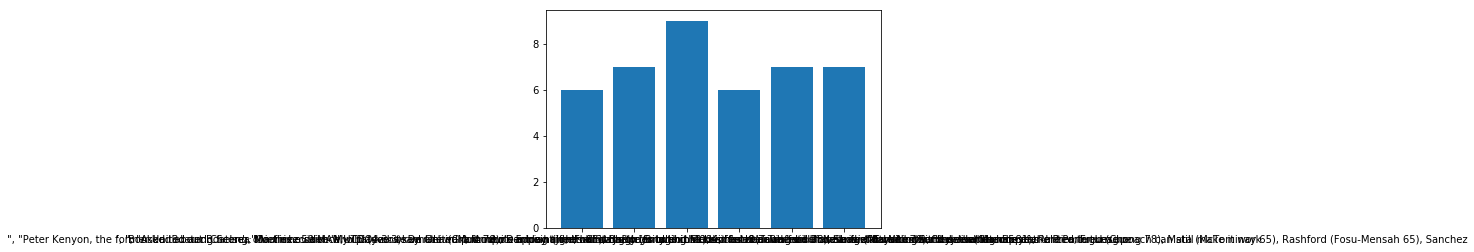

In [82]:
#x, y = zip(sentencerank[0],sentrnk[0]) # unpack a list of pairs into two tuples

plt.bar(sentencerank[0],sentrnk[0])
plt.show()

In [4]:
TextData.articles[0]

"No wonder Jose Mourinho is worried about the start of the new season. Four days to go until it kicks off at Old Trafford and he is still waiting for the real Manchester United to turn up. This has been a strange, disjointed few weeks for Mourinho and his players, and it showed as they completed their pre-season on a muggy night in Munich. On this evidence, whatever team United put out on Friday night will struggle to overcome Leicester never mind challenge Manchester City's dominance of the Premier League. BAYERN MUNICH (3-4-3): Neuer; Kimmich (Rudy 72), Sule, Hummels (Boateng 46), Alaba (Bernat 56); Martinez; Robben, Muller, Thiago (Rafinha 60), Ribery; Gnabry. Subs: Ulreich, Hoffmann, Lewandowski, Boateng, Goretzka, Coman, Mai, Zylla, Franzke. Booked: Boateng Scorer: Martinez 59 MAN UTD (4-3-3): De Gea (Grant 78); Darmian (Jones 65), Bailly (Smalling 51), Lindelof (Tuanzebe 78), Shaw (Mitchell 78); Herrera (Garner 81), Pereira, Fred (Chong 78); Mata (McTominay 65), Rashford (Fosu-Me